# Assignment-5 sbhati@iu.edu

In [1]:
from scipy.io import wavfile
import numpy as np
import os
import math
import cmath
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal
from scipy.stats import mode
from scipy.io.wavfile import read
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import librosa
from librosa import display
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cmath
import seaborn as sns
import scipy
import IPython.display as ipd
import math
from numpy.linalg import inv
from scipy.io import wavfile
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import os
import seaborn as sns
import random
import sys
import scipy.spatial.distance as scipydt
from numpy.linalg import inv
from scipy.spatial import distance
from tqdm import tqdm
from scipy.stats import multivariate_normal

In [2]:
trs_mat = librosa.load("trs.wav",sr = None)[0]

In [3]:
trn_mat = librosa.load("trn.wav",sr = None)[0]

In [4]:
tes_mat = librosa.load("tes.wav",sr = None)[0]

In [5]:
tex_mat = librosa.load("tex.wav",sr = None)[0]

In [6]:
window_size=1024
pi= cmath.pi

def F_matrix(window_size):
    w=cmath.exp(-2j*pi/window_size)
    F_matrix = np.zeros((window_size,window_size),dtype=complex)
    for i in range(0,window_size):
        for j in range(0,window_size):
            F_matrix[i][j]= pow(w,i*j)
    return(F_matrix)

In [7]:
def specto(window_size,piano):
    a=0
    b=0
    data_matrix=[]
    hj=0
    while b < len(piano):
        empty_list=np.zeros(window_size,dtype='float64')
        hanningvalues=np.array(np.hanning(window_size))
        i=0
        for i in range (window_size):
            empty_list[i]=hanningvalues[i]*piano[a+i]
        data_matrix.append(empty_list)
        hj=hj+1

        a=int(a+(window_size/2))
        b=int(a+window_size)
    data_matrix1=np.array(data_matrix)
    data_matrixfinal=np.transpose(data_matrix1)
    FX=np.matmul(F_matrix(window_size),data_matrixfinal)
    return(FX)

In [8]:
def F_inverse(window_size):
    Finverse_matrix = np.zeros((window_size,window_size),dtype=complex)
    pi= cmath.pi
    w1=cmath.exp(2j*pi/window_size)
    for i in range(0,window_size):
        for j in range(0,window_size):
            Finverse_matrix[i][j]= 1/window_size*(pow(w1,i*j))
    return(Finverse_matrix)

In [9]:
def convert2timedomain(cd,window_size):
    X_transpose=np.transpose(cd)
    for i in range(1,len(X_transpose),1):
        for j in range(512):
            X_transpose[i][j]=X_transpose[i][j]+X_transpose[i-1][j+int(window_size/2)]  

    fgfh=np.array(X_transpose[0:len(X_transpose)-1,0:int(window_size/2)])
    ghj= np.array(X_transpose[len(X_transpose)-1,int(window_size/2):window_size],dtype='float64')
    fghjja=np.array(fgfh.flatten(),dtype='float64')
    gh1=list(fghjja)
    gh2=list(ghj)
    gh3=gh1+gh2
    gh4=np.array(gh3,dtype='float64')
    return(gh4)

In [10]:
trs_sumoftrsandtrnx=trs_mat+trn_mat

In [11]:
trs_specto=specto(1024,trs_mat)[0:513]
trn_specto=specto(1024,trn_mat)[0:513]

trs_mag=np.absolute(trs_specto)
trn_mag=np.absolute(trn_specto)
x_mat = specto(1024,trs_sumoftrsandtrnx)[0:513]
x_mag = np.absolute(x_mat)

In [12]:
ibm = np.zeros((trs_mag.shape[0],trs_mag.shape[1]))
for i in range(trs_mag.shape[0]):
    for j in range(trn_mag.shape[1]):
        if (trs_mag[i,j] > trn_mag[i,j]):
            ibm[i,j] = 1
print(ibm.shape)

(513, 786)


In [13]:
def activation_function2(z):
    sigmoid_value = 1 / (1 + np.exp(-z))
    return sigmoid_value

In [14]:
def activation_function1(z):
    tanhx_value=np.tanh(z)
    return tanhx_value

In [15]:
x1 = x_mag
bias  = [1] * 786
bias = np.array(bias).reshape((1,786))
x1 = np.concatenate((x1,bias),axis=0)
print(x1.shape)

(514, 786)


In [16]:
a1 = np.random.normal(0.01, 0.051, 50 * 514)*0.001
a1 = a1.reshape((50, 514))

In [17]:
a2 = np.random.normal(0.01, 0.051, 513 * 51)*0.001
a2 = a2.reshape((513, 51))

In [18]:
def cost(a1,a2,x1,y_train):
    z1 = np.matmul(a1, x1)
    x2 = activation_function2(z1)
    bias  = [1] * 786
    bias = np.array(bias).reshape((1,786))
    x2_updatewithones = np.concatenate((x2,bias),axis=0)
    z2 = np.matmul(a2, x2_updatewithones)
    y_cap = activation_function2(z2)
    err = np.sum(np.square(y_cap - y_train) )
    return err
    
    
def accuracy(a1,a2,x1):
    z1 = np.matmul(a1, x1)
    x2 = activation_function2(z1)
    bias  = [1] * len(x2[0])
    bias = np.array(bias).reshape((1,len(x2[0])))
    x2_updatewithones = np.concatenate((x2,bias),axis=0)
    z2 = np.matmul(a2, x2_updatewithones)
    y_cap = activation_function2(z2)
    final_cap=np.zeros((len(y_cap),len(y_cap[0])))
    for i in range(len(y_cap)):
        for j in range(len(y_cap[0])):
            if y_cap[i][j]>0.5:
                final_cap[i][j]=1
            else:
                final_cap[i][j]=0
                
    return(final_cap)
    
    

In [19]:
alpha = 0.0001
error = []
cost_initial = cost(a1,a2,x1,ibm)

In [20]:
for i in tqdm(range(35000)):
    z1 = np.matmul(a1, x1)
    x2 = activation_function2(z1)
    bias  = [1] * 786
    bias = np.array(bias).reshape((1,786))
    x2_updatewithones = np.concatenate((x2,bias),axis=0)
    z2 = np.matmul(a2, x2_updatewithones)
    y_cap = activation_function2(z2)
    
    err=(y_cap-ibm)*(np.multiply(y_cap,(1-y_cap)))
    
    a2=a2-np.multiply(alpha,np.matmul(err,x2_updatewithones.T))

    gradient_layer2=np.multiply(x2,1-x2)

    
    step4=np.matmul(a2[:,0:50].T,err)
   
    step5=np.multiply(step4,gradient_layer2)
  
    a1=a1-np.multiply(alpha,np.matmul(step5,x1.T))
    cost_final=cost(a1,a2,x1,ibm)

    
    error.append(cost_initial)
    cost_initial=cost_final
        
    

100%|██████████| 35000/35000 [08:17<00:00, 70.29it/s]


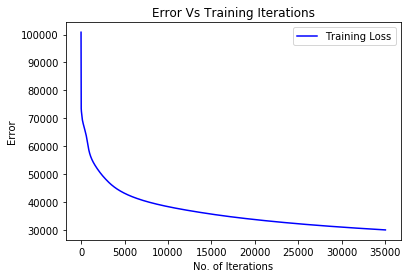

In [21]:
fig = plt.figure()
plt.plot( error, c='Blue', label='Training Loss')
plt.xlabel('No. of Iterations')
plt.ylabel('Error')
plt.title('Error Vs Training Iterations')
plt.legend()
plt.show()

In [22]:
tex_specto=specto(1024,tex_mat)[0:513]
specto_mix=tex_specto
tex_mag=np.absolute(tex_specto)
mixture_mat = tex_mag
mixture_mag = np.absolute(mixture_mat)

In [23]:
bias  = [1] * 98
bias = np.array(bias).reshape((1,98))
mixture_final = np.concatenate((mixture_mag,bias),axis=0)

In [24]:
mx=accuracy(a1,a2,mixture_final)
mx_test=np.multiply(specto_mix,mx)

In [25]:
S_new_conjugate=np.conjugate(mx_test)[::-1][1:512]
S_new_final=np.vstack((mx_test,S_new_conjugate))
cd=(np.matmul(F_inverse(1024),S_new_final).real)

In [26]:
S_timedomain1=convert2timedomain(cd,1024)/np.iinfo(np.int16).max
print(len(S_timedomain1))

50176


In [27]:
ipd.Audio(S_timedomain1, rate=16000)

### Calculating SNR

In [28]:
source_signal=tes_mat[0:len(S_timedomain1)]/np.iinfo(np.int16).max
print(len(tes_mat))

50791


In [29]:
sourceminusrecovered=(source_signal- S_timedomain1)

In [30]:
source_signal_square=np.sum(np.square(source_signal))

In [31]:
sourceminusrecoveredsquare=np.sum(np.square(sourceminusrecovered))
print(sourceminusrecoveredsquare)

8.37808803540234e-10


In [32]:
SNR=10*np.log10(source_signal_square/sourceminusrecoveredsquare)

In [33]:
print(SNR)

7.5176995441539605


In [34]:
def signal2noise(calculated,original):
    small_len=min(len(calculated),len(original))
    diff=original[:small_len]-calculated[:small_len]
    val=10*np.log10((np.sum(np.square(original[:small_len])))/(np.sum(np.square(diff))))
    return val

In [35]:
signal2noise(S_timedomain1,source_signal)

7.5176995441539605

In [36]:
print(" The signal to noise ratio is :",SNR)

 The signal to noise ratio is : 7.5176995441539605


# Problem 4

In [37]:
matdata = scipy.io.loadmat('twitter.mat')

xtr = matdata['Xtr']
xte = matdata['Xte']
yte = matdata['YteMat']
ytr = matdata['YtrMat']

In [38]:
# Generate NMF model for Xtr

B = np.random.normal(0, 0.1, (891, 50))
B_one = np.ones((891, 891))
B = B / np.dot(B_one, B)


O = np.dot(B.T, xtr)
O_one = np.ones((50, 50))
O = O / np.dot(O_one, O)

i = 0
epsi = 0.001
while (True):

    t1 = xtr / (np.dot(B, O) + epsi)
    t2 = np.dot(t1, O.T)
    B = B * t2

    B = B / np.dot(B_one, B)

    t1 = xtr / (np.dot(B, O) + epsi)
    t2 = np.dot(B.T, t1)
    O = O * t2

    O = O / np.dot(O_one, O)

    Y = np.dot(B, O)
    err = np.linalg.norm(xtr - Y)

    i += 1
    if i == 1000:  # Based on the change in the B_s after every iteration decided to break at 2000
        break
B_tr = B
O_tr = O

In [39]:
# Generate NMF model for Xte .. only updating O
B = B_tr
O = np.random.normal(0, 0.1, (50, 193))
O_one = np.ones((50, 50))
O = O / np.dot(O_one, O)

i = 0
epsi = 0.001
while (True):

    t1 = xte / (np.dot(B, O) + epsi)
    t2 = np.dot(B.T, t1)
    O = O * t2

    O = O / np.dot(O_one, O)

    Y = np.dot(B, O)
    err = np.linalg.norm(xte - Y)

    i += 1
    if i == 1000:  # Based on the change in the W_s after every iteration decided to break at 1000
        break
O_te = O

bias = np.ones((1,773))
x1 = np.concatenate((O_tr,bias),axis=0)
x1 = x1.T

In [40]:
def softmax(z):
    softmax_value =  (z / (np.sum(z,axis=1)[:,None] + 0.000001))
    return softmax_value


alpha = 0.0001
i = 0
a1 = np.random.normal(0, 0.1, 51 * 3)
a1 = a1.reshape((51, 3))
err_list = []
while (True):
    i += 1
    z1 = np.dot(x1, a1)
    z1 = np.exp(z1)
    y_cap = softmax(z1)

    err = - (ytr.T * np.log(y_cap))
    esum = np.sum(np.abs(err))

    g1 = (y_cap - ytr.T)
    a1 = a1 - (alpha * np.dot(x1.T, g1))
    if (i == 50000):
        break

pred = np.argmax(y_cap,axis=1)
actual = np.argmax(ytr.T,axis=1)
correct = pred == actual
bincnt = np.bincount(correct)
acc = bincnt[1] / np.sum(bincnt)
print("Training Accuracy is:",acc*100)

Training Accuracy is: 60.41397153945667


In [41]:
bias = np.ones((1,193))
x1_test = np.concatenate((O_te,bias),axis=0)
x1_test = x1_test.T

z1 = np.dot(x1_test,a1)
z1 = np.exp(z1)
y_cap_test = softmax(z1)

test_pred = np.argmax(y_cap_test,axis=1)
test_actual = np.argmax(yte.T,axis=1)
test_correct = test_pred == test_actual
test_bincnt = np.bincount(test_correct)
test_acc = test_bincnt[1] / np.sum(test_bincnt)
print("Test Accuracy is:",test_acc*100)

Test Accuracy is: 54.40414507772021


## Problem-2

In [42]:
img = plt.imread('im0.ppm')
left_img = img

In [43]:
img2 = plt.imread('im8.ppm')
right_img = img2

In [44]:
d_matrix=np.zeros((381,390))

In [45]:
for i in range(len(right_img)):
    row_selection=right_img[i,:]
    for j in range (len(left_img[0])-40):
        dist=np.argmin(distance.cdist([row_selection[j]], left_img[i,j:j+40], 'euclidean')[0])
        d_matrix[i][j]=dist

In [46]:
reshaped_matrix_d=np.reshape(d_matrix,(1,381*390))

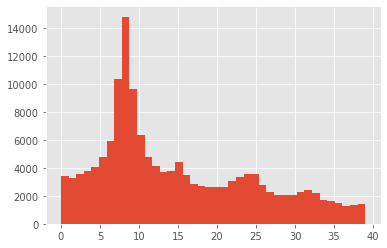

In [47]:
plt.style.use('ggplot')
plt.hist(reshaped_matrix_d[0], bins=40)
plt.show()

Text(0.5, 1.0, 'Histogram')

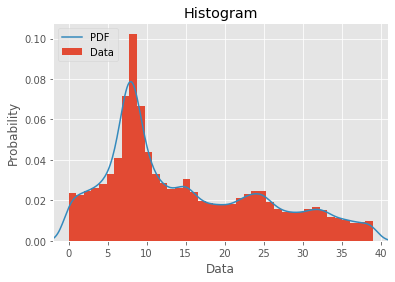

In [48]:
import scipy.stats as st
plt.hist(reshaped_matrix_d[0], density=True, bins=40, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(reshaped_matrix_d[0])
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel('Probability')
plt.xlabel('Data')
plt.title("Histogram")

In [49]:
n_gaussians=4

## Intialising prior probailities
prior_probability=np.ones(n_gaussians)*(1/n_gaussians)

disparity=reshaped_matrix_d[0]

In [50]:
## Intializing means
means=[6,15,23,32]


##Intializing sigma
sigma=np.random.uniform(0,20,n_gaussians)

##Intializing likelihood(probability of data point given cluster)
L=np.zeros([len(disparity),n_gaussians])

## Inialising posterior probabilities
U=np.zeros([len(disparity),n_gaussians])

In [51]:
iterations=10000
for iter in tqdm(range(iterations)):
    
    
    mu_previous,sigma_previous=means.copy(),sigma.copy()
    
    for i in range(n_gaussians):
        
        L[:,i]=multivariate_normal.pdf(disparity,mu_previous[i],sigma_previous[i])
        
    
    ### Normalisation
    
    P_normalise= np.sum(prior_probability*L,axis=1)
    
    U= prior_probability*L/P_normalise.reshape(-1,1)
    
    ## M_step
    
    prior_probability=np.mean(U,axis=0)
    
    for k in range(n_gaussians):
        
        means[k]= np.dot(U[:,k],disparity)/np.sum(U[:,k])
        sigma[k]=np.sum(U[:,k]*(disparity-means[k])**2)/np.sum(U[:,k])
    
    
    if np.array_equal(np.round(means, 7), np.round(mu_previous, 7)) and np.array_equal(np.round(sigma, 7),np.round(sigma_previous, 7)):
        break

 20%|█▉        | 1981/10000 [00:47<06:02, 22.12it/s]

In [52]:
sd=np.argmax(U,axis=1)
sd1=[]
for i in range(len(sd)):
    sd1.append(means[sd[i]])

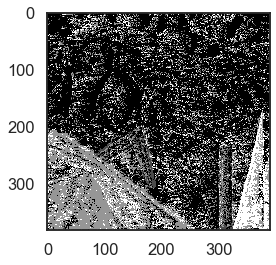

In [53]:
GMM_matrix=np.reshape(sd1,(381,390))
sns.set(style="white", context="talk")
plt.imshow(GMM_matrix,cmap='gray')
plt.savefig('GMM.png')
plt.show()

In [54]:
def neighbors(data,x, y):
    if x==0 and y==0:
        return np.array([data[x, y+1],data[x+1, y+1],data[x+1, y]])
    if x==380 and y==0:
        return np.array([data[x-1, y],data[x-1, y+1],data[x, y+1]])
    if x==0 and y==389:
        return np.array([data[x, y-1],data[x+1, y-1],data[x+1, y]])
    if x==380 and y==389:
        return np.array([data[x-1, y],data[x-1, y-1],data[x, y-1]])
    if x == 0:
        return np.array([data[x, y+1],data[x, y-1],data[x+1, y-1],data[x+1, y],data[x+1, y+1]])
    if x == 380:
        return np.array([data[x, y+1],data[x, y-1],data[x-1, y-1],data[x-1, y],data[x-1, y+1]])
    if y == 0:
        return np.array([data[x-1, y],data[x+1, y],data[x-1, y+1],data[x, y+1],data[x+1, y+1]])
    if y == 389:
        return np.array([data[x-1, y],data[x+1, y],data[x-1, y-1],data[x, y-1],data[x+1, y-1]])
    else:
        return np.array([data[x-1, y-1],data[x-1, y],data[x-1, y+1],data[x, y-1],data[x, y+1],data[x+1, y-1],data[x+1, y],data[x+1, y+1]])
 

In [55]:
initialmeans=GMM_matrix.copy()
assigned_class=np.reshape(sd,(381,390))

In [56]:
def Cumulative(lists):  
    cu_list = []  
    length = len(lists)  
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]  
    return cu_list[1:]  

In [57]:
no_of_iteration=30
a=5
class_list = []
for reps in tqdm(range(no_of_iteration)):
    new_class=[]

    for i in range(len(initialmeans)): 
        
        for j in range(len(initialmeans[0])):
            
            index = i *initialmeans.shape[1] + j
            
            Nei_class=neighbors(assigned_class,i,j)
            
            list_ofP_neighbors=[]
            
            for k in range(4):
            
                z = list(np.equal(k, Nei_class))

                f_c = np.array([0 if x == True else a for x in z])

                P_c = np.exp(np.negative(np.square(f_c)))

                P_c_nei = np.prod(P_c)
                
                list_ofP_neighbors.append(P_c_nei)   

            x = L[index, :]
            
            P_c_x = np.array(x) * np.array(list_ofP_neighbors)
            
            P_c_x_sum = np.sum(P_c_x)
            
            P_c_x = P_c_x / P_c_x_sum
            
            random_number=np.random.uniform(0,1,1)[0]
            
            p_c_x_sort=np.sort(P_c_x)
            
            cumulativelist= Cumulative(p_c_x_sort)
            
            for l in range(len(cumulativelist)):
                if random_number<=cumulativelist[l]:
                    index1=l
                    break
                else:
                    l=l+1
            index2=np.argsort(P_c_x)
            
            final_class=index2[index1]
            
            new_class.append(final_class)
            
    class_list.append(new_class)
    new_class1 = np.array(new_class)
    new_class2 = new_class1.reshape((381, 390))
    assigned_class = new_class2.copy()   


100%|██████████| 30/30 [10:37<00:00, 21.25s/it]


In [58]:
 gh1=np.array(class_list)

In [59]:
final_list_Gibbs=[]
for kl in range (len(gh1[0])):
    counts = np.bincount(np.array(gh1[:,kl]))
    final_list_Gibbs.append(np.argmax(counts))

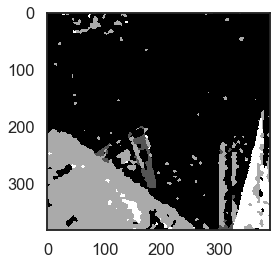

In [60]:
GMM_matrix1=np.reshape(final_list_Gibbs,(381,390))
sns.set(style="white", context="talk")
plt.imshow(GMM_matrix1,cmap='gray')
plt.savefig('Gibbs.png')
plt.show()

## Problem-3

In [61]:
training = scipy.io.loadmat('trX.mat')
labels=  scipy.io.loadmat('trY.mat')

In [62]:
training1=training['trX'] 
y_train=labels['trY']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


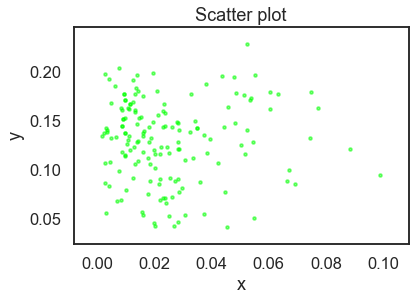

In [63]:
x=training1[0,:]
y=training1[1,:]
colors = (0,1,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [64]:
data_points_withones=np.vstack([training1, [1]*160])
initial_sample_weights=[1/160]*160
initial_sample_weights1=np.reshape(initial_sample_weights,(1,160))

In [65]:
y_train_final=y_train.flatten()

In [66]:
phi=[]
full_cost_list=[]
beta_list=[]
weights=[]

In [67]:
def cost(a_ini,data_points_withones,y_train,initial_sample_weights1):
    pb_3=np.matmul(a_ini,data_points_withones)
    pb_3_step1=np.tanh(pb_3)
    y_new=np.reshape(y_train,(1,160))
    cost=np.sum(np.multiply(initial_sample_weights1,(pb_3_step1-y_new)**2))
    return(cost)

In [68]:
for m in range(1000):
    w_ni=np.random.normal(0,1,3)*0.0001
    a_ini=np.reshape(w_ni,(1,3))
    rho=0.005
    cost_initial=cost(a_ini,data_points_withones,y_train,initial_sample_weights1)
    costlist=[]
    for iter in range(1000):
        pb_3=np.matmul(a_ini,data_points_withones)
        pb_3_step1=np.tanh(pb_3)
        y_new=np.reshape(y_train,(1,160))
        err_step1= 2*np.multiply(initial_sample_weights1,(pb_3_step1-y_new))
        err=err_step1*(np.multiply((1+pb_3_step1),(1-pb_3_step1)))
        w_ini=a_ini-np.multiply(rho,np.matmul(err,data_points_withones.T))
        a_ini=w_ini.copy()
        costlist.append(cost_initial)
        cost_initial=cost_final
    
    final_pb3=pb_3_step1.flatten()
    y_test=[0]*160
    for i in range(len(final_pb3)):
        if final_pb3[i]>0:
            y_test[i]= 1
        else:
            y_test[i]= -1
    a=0
    b=0
    for j in range(len(final_pb3)):
        if y_test[j]==y_train_final[j]:
            a=a+initial_sample_weights1[0][j]
        else:
            b=b+initial_sample_weights1[0][j]

    beta=0.5*np.log(a/b)
    beta_list.append(beta)
    phi.append(y_test)

    w_new=[0]*160
    for k in range(len(final_pb3)):
        if y_test[k]==y_train_final[k]:
            w_new[k]=initial_sample_weights1[0][k]*np.exp(-beta)
        else:
            w_new[k]=initial_sample_weights1[0][k]*np.exp(beta)
    weights.append(initial_sample_weights1)
    w_new1=np.array(w_new)/np.sum(np.array(w_new))
    initial_sample_weights1=np.reshape(w_new1,(1,160))

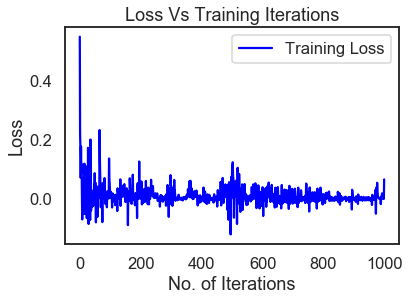

In [69]:
fig = plt.figure()
plt.plot( beta_list, c='Blue', label='Training Loss')
plt.xlabel('No. of Iterations')
plt.ylabel('Loss')
plt.title('Loss Vs Training Iterations')
plt.legend()
plt.show()

In [70]:
gh=np.reshape(beta_list,(1000,1))
ghf=np.multiply(gh,phi)
fd=ghf.sum(axis=0)

In [71]:
for i in range(len(fd)):
    if fd[i]>0:
        fd[i]=1
    else:
        fd[i]=-1

In [72]:
df=0
for k in range(len(fd)):
    if fd[k]==y_train_final[k]:
        df=df+1

In [73]:
print("The accuracy of classification is",(df/160)*100)

The accuracy of classification is 85.0
